In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
from collections import defaultdict

plt.rcParams['figure.figsize'] = (15, 12)

#%matplotlib notebook
%matplotlib inline

In [2]:
G = 6.67428e-11

# Simulator

## Classes

In [80]:
class Body:
    
    
    def __init__(self, name, mass, position, velocity):
        self.name = name
        self.mass = mass
        self.position = position
        
        self.tragectory = []
        
        self.velocity = velocity
        self.acceleation = np.array([0, 0 ,0], dtype='float64')
    
    
    def accelerate(self, other_bodies):
        
        self.acceleation = np.array([0, 0, 0], dtype='float64')
        
        for body in other_bodies:
            
            if (body.position == self.position).all():
                continue
                
            r = np.sqrt( np.sum( ( self.position - body.position ) ** 2 ) )
            
            print(r)
            
            tmp = G * body.mass / r**3
            
            print(tmp)
            
            self.acceleation += tmp * (body.position - self.position)
    
    
    def update_velocity(self, time_step = 1):
        self.velocity += self.acceleation * time_step
    
    
    def update_position(self, time_step = 1):
        self.tragectory.append( self.position.copy() )
        self.position += self.velocity * time_step

## Simulation

In [81]:
bodies = [
    Body("Sun", 2e30, np.array([0, 0, 0], dtype='float64'), np.array([0, 0, 0], dtype='float64')),
    Body("Earth", 6e24, np.array([0, 1.5e11, 0], dtype='float64'), np.array([30000, 0, 0], dtype='float64')),
]

In [ ]:
STEPS = 1000

for _ in range(STEPS):
    
    for body in bodies:
        body.accelerate(bodies)
        body.update_velocity(1000)
    
    for idx, body in enumerate(bodies):
        body.update_position(1000)

## Vizualization

In [218]:
def plot_output(bodies, outfile = None):
    
    fig = plt.figure()
    cmap = plt.get_cmap('viridis')
    ax = fig.add_subplot(1,1,1)
    
    max_range = 0
    
    for idx, (name, trajectory) in enumerate(bodies.items()): 
        max_dim = trajectory.max()
        
        if max_dim > max_range:
            max_range = max_dim
        
        ax.plot(trajectory[:, 0], trajectory[:, 1], c = cmap(idx/len(bodies)), label = name)        
    
    ax.scatter([0], [0], s=200)
    #ax.set_xlim([-max_range,max_range])    
    #ax.set_ylim([-max_range,max_range])
    #ax.set_zlim([-max_range,max_range])
    
    ax.legend()        
        
    if outfile:
        plot.savefig(outfile)
    else:
        plt.show()

In [234]:
def plot_output(bodies, outfile = None):
    
    fig = plt.figure()
    cmap = plt.get_cmap('viridis')
    ax = fig.add_subplot(1,1,1, projection='3d')
    
    max_range = 0
    
    for idx, (name, trajectory) in enumerate(bodies.items()): 
        max_dim = trajectory.max()
        
        if max_dim > max_range:
            max_range = max_dim
        
        ax.plot(trajectory[:, 0], trajectory[:, 1], c = cmap(idx/len(bodies)), label = name)        
    
    ax.scatter([0], [0], s=200)
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    
    ax.legend()        
        
    if outfile:
        plot.savefig(outfile)
    else:
        plt.show()

# Load data

In [45]:
def load_body_data(file_name, planet_name, num_points):
    
    data = []
    
    with open(file_name) as file:
        line = file.readline()
        while line:
            line = line.strip('\n')
            if line.split(",")[0] == planet_name:
                data.append(list(map(float, line.split(",")[1:])))
                
                if len(data) == num_points:
                    break
                    
            line = file.readline()
    
    return np.array(data)

In [46]:
modeled_data = load_body_data('two_bodies.csv', 'Mercury', 10000)

# Metrics

In [13]:
%matplotlib inline

In [184]:
def make_circle(radius, num_points):
    x = np.linspace(-radius, radius, num_points)
    y = np.sqrt(-x**2+radius**2)
    return np.array(list(zip(x.tolist()+x.tolist(), y.tolist()+((-1)*y).tolist())))

In [14]:
r1 = 100
r2 = 20

In [18]:
# Stupidest algorithm possible

closest_pairs = np.array(list(map(lambda x: [x, min(second_circle, key=lambda y: sum((x-y)**2))], first_circle)))

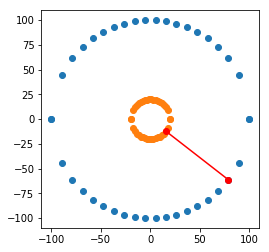

In [19]:
plt.scatter(first_circle[:, 0], first_circle[:, 1])
plt.scatter(second_circle[:, 0], second_circle[:, 1])
i=-3
plt.plot(closest_pairs[i,:,0],closest_pairs[i,:,1], 'ro-')
plt.gca().set_aspect('equal')

In [200]:
def dist(p1, p2):
    return np.sqrt(((p1-p2)**2).sum())

def get_relative_closeness(pred_fig, real_fig):
    
    closest_pairs = np.array(list(map(lambda x: [x, min(pred_fig, key=lambda y: sum((x-y)**2))], 
                                                                              real_fig)))
    scores = []
    
    for pair in closest_pairs:
        
        real_len = dist(pair[0], np.zeros(pair[0].shape[0]))
        pred_len = dist(pair[1], np.zeros(pair[0].shape[0]))
        scores.append( (real_len-pred_len)/real_len )
    
    return scores

# Empirical data

In [176]:
def find_possible_points(curr_point, curr_radius, velocity, next_radius, T):
        
    velocity*=curr_point[1] * -1
    D = ((curr_point[0]**2) * (((curr_radius**2)+velocity*T)**2) - 
                    ((curr_point[1]**2)+(curr_point[0]**2))*((((curr_radius**2)+velocity*T)**2) - (next_radius**2)*(curr_point[1]**2)))

    x1 = (curr_point[0]*((curr_radius**2)+velocity*T) + np.sqrt(D)) / ((curr_point[0]**2)+(curr_point[1]**2))
    x2 = (curr_point[0]*((curr_radius**2)+velocity*T) - np.sqrt(D)) / ((curr_point[0]**2)+(curr_point[1]**2))
    
    y1 = ((curr_radius**2) + velocity*T - curr_point[0]*x1) / curr_point[1]
    y2 = ((curr_radius**2) + velocity*T - curr_point[0]*x2) / curr_point[1]
    
    return np.array([x1, y1]), np.array([x2, y2])

In [196]:
def find_possible_points(curr_point, curr_radius, velocity, next_radius, T):
    
    x = curr_point[0]; y = curr_point[1]
    
    A = x
    B = y
    C = -curr_radius**2 - velocity*T*y
    
    div = A**2+B**2
    
    D = -(A*C) / div
    E = -(B*C) / div
    print((A*next_radius)**2 + (B*next_radius)**2 - C**2)
    F = B * np.sqrt((A*next_radius)**2 + (B*next_radius)**2 - C**2) / div
    G = A * np.sqrt((A*next_radius)**2 + (B*next_radius)**2 - C**2) / div
    
    x1 = D + F
    y1 = E - G
    x2 = D - F
    y2 = E + G
    
    return [x1, y1], [x2, y2]

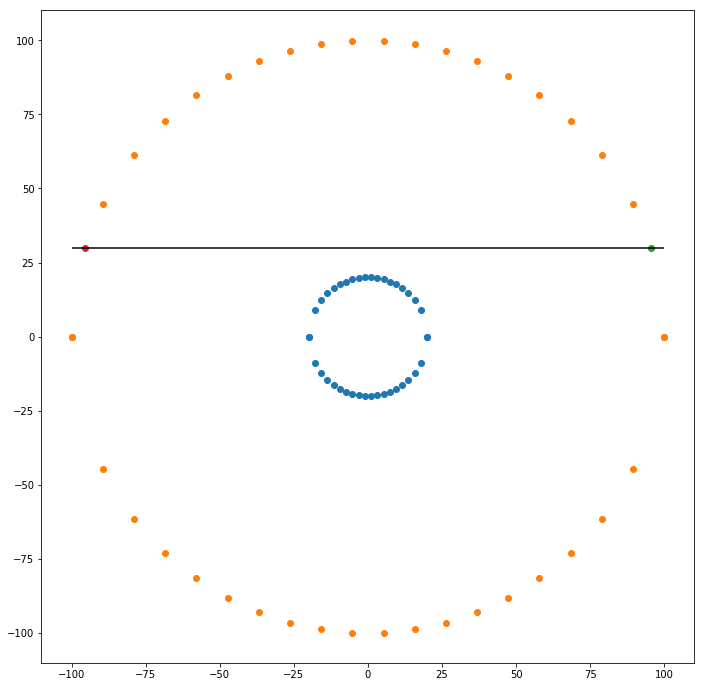

In [190]:
velocity = 10
T = 1
r1 = 20
r2 = 100

first_circle = make_circle(r1, 20)
second_circle = make_circle(r2, 20)

p1, p2 = find_possible_points([0, r1], r1, velocity, r2, T)

plt.scatter(first_circle[:, 0], first_circle[:, 1])
plt.scatter(second_circle[:, 0], second_circle[:, 1]) 
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.hlines(r1+velocity, -r2, r2)

plt.gca().set_aspect('equal')

In [191]:
def point_is_left(trajectory_point, new_point):
    if trajectory_point[0] > 0 and trajectory_point[1] > 0:
        return new_point[0] < trajectory_point[0]
    if trajectory_point[0] < 0 and trajectory_point[1] >0:
        if new_point[1] < 0:
            return True
        else:
            return new_point[0] < trajectory_point[0]
    if trajectory_point[0] < 0 and trajectory_point[1] < 0:
        return new_point[0] > trajectory_point[0]
    if trajectory_point[0] > 0 and trajectory_point[1] < 0:
        if new_point[1] > 0:
            return True
        else:
            return new_point[0] > trajectory_point[0]

In [192]:
def build_trajectories(radiuses, radix_velocities, go_left=True):
    
    T = 60 * 60

    assert len(radiuses) == len(radix_velocities)
        
    coordinates = []
    
    #choose first point
    
    coordinates.append(np.array([0, radiuses[0]]))
    
    # Iterate over dots 
    
    for i in range(len(radiuses)):
        
        curr_point = coordinates[-1]
        curr_radius = radiuses[i]
        next_radius = radiuses[i+1 if i+1<len(radiuses) else 0]

        velocity = radix_velocities[i]
        
        j=0
        dist = next_radius - curr_radius
        while True:

            if velocity*T > dist:
                if j >= len(radix_velocities):
                    return coordinates
                velocity = radix_velocities[i+j if i+j < len(radix_velocities) else j]
                j+=1
            else:
                break
            
        # Find coordinates of intersections
        print(i)
        
        print(curr_radius, velocity, next_radius)
        print(np.abs(velocity * T), np.abs(next_radius - curr_radius))
        #if np.abs(velocity * T) <= np.abs(next_radius - curr_radius):
        points = find_possible_points(curr_point, curr_radius, velocity, next_radius, T)
        #else:
        #    print("HERE")
        #    points = get_intersection_points(next_radius, curr_point, np.abs(velocity)*T)
            
        print("Possible points: ", points)
        # Define which way to go
        
        first_left = point_is_left(curr_point, points[0])
        
        if go_left:
            if first_left:
                point = points[0]
            else:
                point = points[1]
        else:
            if first_left:
                point = points[1]
            else:
                point = points[0]
        
        print("Chose: ", point)
        
        #if np.isnan(point[0]):
        #    continue
            
        coordinates.append(point)
        
        
    return coordinates

In [198]:
raw_data = pd.read_excel("MovementData/Mercury4.xlsx", names=['dist', 'speed']).values * 1e3

In [199]:
c = np.array(build_trajectories(raw_data[:, 0], raw_data[:, 1]))

0
58254485221.99999 2444.8442999999997 58263287846.99999
8801439.479999999 8802625.0
4.688053971902543e+35
Possible points:  ([11753492.447226942, 58263286661.47999], [-11753492.447226942, 58263286661.47999])
Chose:  [-11753492.447226942, 58263286661.47999]
1
58263287846.99999 2439.8803 58272088948.0
8783569.08 8801101.00000763
6.936084929693871e+36
Possible points:  ([33447209.49686957, 58272079348.928345], [-56957738.22190892, 58272061111.476746])
Chose:  [-56957738.22190892, 58272061111.476746]
2
58272088948.0 2439.8803 58280888522.0
8783569.08 8799574.0
6.336429733340727e+36
Possible points:  ([-13768534.839668944, 58280886895.6302], [-100164112.50014234, 58280802448.69968])
Chose:  [-100164112.50014234, 58280802448.69968]
3
58280888522.0 2439.8803 58289686565.0
8783569.08 8798043.0
5.736529328300481e+36
Possible points:  ([-59083373.82598906, 58289656621.058235], [-141275042.7902591, 58289515362.61239])
Chose:  [-141275042.7902591, 58289515362.61239]
4
58289686565.0 2439.8803 5829

74
58901504933.0 2410.0894 58910184075.0
8676321.84 8679142.0
4.6837928485897986e+36
Possible points:  ([-2591396652.950112, 58853160077.75167], [-2664809123.5023007, 58849881733.8292])
Chose:  [-2664809123.5023007, 58849881733.8292]
75
58910184075.0 2410.0894 58918861403.00001
8676321.84 8677328.00000763
4.043453156413993e+36
Possible points:  ([-2631102243.299308, 58860084352.736275], [-2699300149.0897493, 58856996251.34678])
Chose:  [-2699300149.0897493, 58856996251.34678]
76
58918861403.00001 2405.1231 58927536913.0
8658443.16 8675509.99999237
1.0702017829481584e+37
Possible points:  ([-2644230997.889172, 58868180276.46837], [-2755161820.5765376, 58863092765.97191])
Chose:  [-2755161820.5765376, 58863092765.97191]
77
58927536913.0 2405.1231 58936210603.0
8658443.16 8673690.0
1.0116363004588134e+37
Possible points:  ([-2701650075.2738566, 58874255894.33756], [-2809482332.869591, 58869208668.56002])
Chose:  [-2809482332.869591, 58869208668.56002]
78
58936210603.0 2405.1231 5894488246

59793755875.0 2350.474 59802227018.0
8461706.4 8471143.0
6.527025772848716e+37
Possible points:  ([-10822555348.288958, 58814782597.96284], [-11088211123.497282, 58765278272.06437])
Chose:  [-11088211123.497282, 58765278272.06437]
179
59802227018.0 2350.474 59810695978.99999
8461706.4 8468960.99999237
6.58719098929594e+37
Possible points:  ([-10956389581.35472, 58798612915.900894], [-11223116105.745531, 58748285237.692856])
Chose:  [-11223116105.745531, 58748285237.692856]
180
59810695978.99999 2350.474 59819162755.0
8461706.4 8466776.00000763
6.649755542751165e+37
Possible points:  ([-11090757268.324062, 58782032424.23909], [-11358594112.027496, 58730865586.22641])
Chose:  [-11358594112.027496, 58730865586.22641]
181
59819162755.0 2350.474 59827627341.00001
8461706.4 8464586.00000763
6.714684281164213e+37
Possible points:  ([-11225678961.485615, 58765033183.9201], [-11494664254.623913, 58713011223.46769])
Chose:  [-11494664254.623913, 58713011223.46769]
182
59827627341.00001 2350.474 

269
60555299913.0 2290.8148999999994 60563559319.0
8246933.639999998 8259406.0
5.25556764326416e+38
Possible points:  ([-30779546092.492214, 52159028554.27983], [-31429215285.879543, 51770156885.022736])
Chose:  [-31429215285.879543, 51770156885.022736]
270
60563559319.0 2290.8148999999994 60571816255.0
8246933.639999998 8256936.0
5.3650018972334974e+38
Possible points:  ([-31105953502.279636, 51974653256.597084], [-31759793727.10335, 51577712501.053474])
Chose:  [-31759793727.10335, 51577712501.053474]
271
60571816255.0 2290.8148999999994 60580070719.0
8246933.639999998 8254464.0
5.476950763305626e+38
Possible points:  ([-31434480027.26468, 51786276500.00085], [-32092471550.273766, 51381107793.759285])
Chose:  [-32092471550.273766, 51381107793.759285]
272
60580070719.0 2290.8148999999994 60588322708.00001
8246933.639999998 8251989.000007629
5.591460328948338e+38
Possible points:  ([-31765117121.990875, 51593819230.55272], [-32427236854.991486, 51180261415.11034])
Chose:  [-32427236854

61654735103.99999 2191.2892 61662632720.0
7888641.120000001 7897616.000007629
6.137651904536018e+39
Possible points:  ([-47223341134.055885, -39651435359.87316], [-45549395712.531456, -41563599750.07983])
Chose:  [-45549395712.531456, -41563599750.07983]
406
61662632720.0 2191.2892 61670527493.0
7888641.120000001 7894773.0
6.19551028241922e+39
Possible points:  ([-46405882070.72745, -40617090867.05504], [-44685053673.291016, -42502940362.75572])
Chose:  [-44685053673.291016, -42502940362.75572]
407
61670527493.0 2191.2892 61678419419.0
7888641.120000001 7891926.0
6.252595488049565e+39
Possible points:  ([-45564791828.84786, -41570147553.50087], [-43797436753.07781, -43428239152.494125])
Chose:  [-43797436753.07781, -43428239152.494125]
408
61678419419.0 2191.2892 61686308497.0
7888641.120000001 7889078.0
6.308864925826631e+39
Possible points:  ([-44700229627.71347, -42509882700.57612], [-42886755519.97508, -44338773742.14289])
Chose:  [-42886755519.97508, -44338773742.14289]
409
616863

7511999.76 7526698.000007629
3.3770009926376284e+39
Possible points:  ([62458943712.54177, 4476092775.692575], [62298826880.26321, 6325442717.001158])
Chose:  [62298826880.26321, 6325442717.001158]
530
62619126920.0 2086.6666 62626650484.0
7511999.76 7523564.0
3.322240177293156e+39
Possible points:  ([62392562437.1553, 5409760010.460262], [62206601203.05233, 7241278727.511187])
Chose:  [62206601203.05233, 7241278727.511187]
531
62626650484.0 2086.6666 62634170913.0
7511999.76 7520429.0
3.2679754112246325e+39
Possible points:  ([62313008625.835625, 6334691938.478982], [62101919296.026695, 8148066378.514762])
Chose:  [62101919296.026695, 8148066378.514762]
532
62634170913.0 2086.6666 62641688203.0
7511999.76 7517290.0
3.214214659100586e+39
Possible points:  ([62220640507.81855, 7250723806.536672], [61985135944.58016, 9045663206.961975])
Chose:  [61985135944.58016, 9045663206.961975]
533
62641688203.0 2086.6666 62649202352.0
7511999.76 7514149.0
3.1609676987309966e+39
Possible points:  ([

615
63247226195.0 2011.864 63254475745.0
7242710.4 7249550.0
6.53976764379343e+38
Possible points:  ([36307220025.442894, 51796857779.20192], [35642077747.791725, 52256779422.34062])
Chose:  [35642077747.791725, 52256779422.34062]
616
63254475745.0 2011.864 63261721984.0
7242710.4 7246239.0
6.3925779083892836e+38
Possible points:  ([35975665272.87716, 52036496582.25282], [35315233239.61295, 52486948564.50168])
Chose:  [35315233239.61295, 52486948564.50168]
617
63261721984.0 2011.864 63268964912.0
7242710.4 7242928.0
6.248033761719e+38
Possible points:  ([35646411961.03269, 52271361521.77626], [34990763590.944496, 52712506906.411865])
Chose:  [34990763590.944496, 52712506906.411865]
618
63268964912.0 2006.8750999999997 63276204526.0
7224750.359999999 7239614.0
6.18187584426736e+38
Possible points:  ([35321502860.44416, 52500185665.346146], [34666682239.92196, 52934858096.461])
Chose:  [34666682239.92196, 52934858096.461]
619
63276204526.0 2006.8750999999997 63283440823.0
7224750.3599999

64010668058.0 1907.0443 64017549388.00001
6865359.48 6881330.000007629
7.401063467737814e+37
Possible points:  ([12297628165.132416, 62825273347.25382], [12033729302.104607, 62876354766.54708])
Chose:  [12033729302.104607, 62876354766.54708]
724
64017549388.00001 1907.0443 64024427212.0
6865359.48 6877823.999992371
7.076506148482233e+37
Possible points:  ([12164058910.85801, 62858276707.50974], [11905934721.471886, 62907678372.61788])
Chose:  [11905934721.471886, 62907678372.61788]
725
64024427212.0 1907.0443 64031301528.00001
6865359.48 6874316.000007629
6.75634126504836e+37
Possible points:  ([12033333549.750074, 62890432174.14009], [11781044710.456282, 62938180470.203354])
Chose:  [11781044710.456282, 62938180470.203354]
726
64031301528.00001 1907.0443 64038172335.0
6865359.48 6870806.999992371
6.440551019324661e+37
Possible points:  ([11905480715.743654, 62921753352.35197], [11659091876.048285, 62967873496.19665])
Chose:  [11659091876.048285, 62967873496.19665]
727
64038172335.0 19

Possible points:  ([2332773810.1593833, 64878146180.84698], [2246848172.965388, 64881178771.66195])
Chose:  [2246848172.965388, 64881178771.66195]
860
64920071515.0 1772.1208 64926457697.0
6379634.88 6386182.0
5.674787549161858e+36
Possible points:  ([2283740917.4370127, 64886280803.43605], [2210396755.291176, 64888820726.41272])
Chose:  [2210396755.291176, 64888820726.41272]
861
64926457697.0 1772.1208 64932840162.0
6379634.88 6382465.0
3.573866351663901e+36
Possible points:  ([2239713997.7622313, 64894201687.917145], [2181513645.5382695, 64896184246.211044])
Chose:  [2181513645.5382695, 64896184246.211044]
862
64932840162.0 1767.1203999999998 64939218908.0
6361633.4399999995 6378746.0
1.1337479728417595e+37
Possible points:  ([2233553364.760999, 64900796541.70594], [2129901141.749626, 64904280856.562294])
Chose:  [2129901141.749626, 64904280856.562294]
863
64939218908.0 1767.1203999999998 64945593933.0
6361633.4399999995 6375025.0
9.210214968813239e+36
Possible points:  ([2176817985.

Chose:  [-2602482263.5654535, 65702388162.680504]
996
65753910334.0 1627.0226 65759778702.0
5857281.36 5868368.0
8.914018928400973e+36
Possible points:  ([-2557343283.0345435, 65710033406.388794], [-2648084532.943888, 65706439130.74576])
Chose:  [-2648084532.943888, 65706439130.74576]
997
65759778702.0 1627.0226 65765643177.0
5857281.36 5864475.0
6.793958222205954e+36
Possible points:  ([-2608715330.66716, 65713883059.883385], [-2687925087.0233145, 65710690768.02523])
Chose:  [-2687925087.0233145, 65710690768.02523]
998
65765643177.0 1627.0226 65771503758.0
5857281.36 5860581.0
4.661810111011028e+36
Possible points:  ([-2655361159.523557, 65717880091.35034], [-2720967403.464311, 65715196438.70734])
Chose:  [-2720967403.464311, 65715196438.70734]
999
65771503758.0 1622.0159999999998 65777360443.0
5839257.6 5856685.0
1.2762678297839367e+37
Possible points:  ([-2666938597.1669455, 65723272783.44622], [-2775478936.3687162, 65718778621.65513])
Chose:  [-2775478936.3687162, 65718778621.65513

1121
66456925948.0 1491.7771 66462299053.0
5370397.5600000005 5373105.0
4.423594909907813e+37
Possible points:  ([-10795890321.375887, 65579615335.70647], [-10993342878.683218, 65546804710.543365])
Chose:  [-10993342878.683218, 65546804710.543365]
1122
66462299053.0 1486.7654 66467668128.99999
5352355.44 5369075.999992371
5.311126551327342e+37
Possible points:  ([-10886074068.463129, 65570147917.19488], [-11102357935.290945, 65533873338.78231])
Chose:  [-11102357935.290945, 65533873338.78231]
1123
66467668128.99999 1486.7654 66473033177.0
5352355.44 5365048.000007629
5.162034698992742e+37
Possible points:  ([-10996664383.140978, 65557131665.40389], [-11209814417.645288, 65521021057.92075])
Chose:  [-11209814417.645288, 65521021057.92075]
1124
66473033177.0 1486.7654 66478394194.0
5352355.44 5361017.0
5.012286176164955e+37
Possible points:  ([-11105723848.136538, 65544181987.58594], [-11315684343.900114, 65508260413.798706])
Chose:  [-11315684343.900114, 65508260413.798706]
1125
6647839

5.15353876225739e+38
Possible points:  ([-37746027142.54856, 55606920150.98767], [-38303101219.61904, 55224673567.92569])
Chose:  [-38303101219.61904, 55224673567.92569]
1269
67207827920.0 1321.2774 67212594781.0
4756598.64 4766861.0
5.211815078442919e+38
Possible points:  ([-38026210691.85122, 55421477764.61621], [-38584446810.687355, 55034292595.69116])
Chose:  [-38584446810.687355, 55034292595.69116]
1270
67212594781.0 1321.2774 67217357481.00001
4756598.64 4762700.000007629
5.2711604726891524e+38
Possible points:  ([-38306987341.66476, 55233575545.44232], [-38866377961.03347, 54841387755.22223])
Chose:  [-38866377961.03347, 54841387755.22223]
1271
67217357481.00001 1321.2774 67222116019.99999
4756598.64 4758538.999984741
5.331601374025576e+38
Possible points:  ([-38588353353.83251, 55043181845.22133], [-39148890498.89849, 54645926242.59923])
Chose:  [-39148890498.89849, 54645926242.59923]
1272
67222116019.99999 1316.2597 67226870397.0
4738534.92 4754377.000007629
5.482362565279397e

Chose:  [-66961018171.93817, -10744806547.440046]
1405
67817614396.0 1160.634 67821808531.0
4178282.4 4194135.0
3.029416752347857e+39
Possible points:  ([-67088950364.52221, -9943362177.970745], [-66831778715.00562, -11546041148.55584])
Chose:  [-66831778715.00562, -11546041148.55584]
1406
67821808531.0 1160.634 67825998408.00001
4178282.4 4189877.0000076294
3.0580943754163005e+39
Possible points:  ([-66969887482.36095, -10742449936.673391], [-66692268085.94212, -12349390170.96977])
Chose:  [-66692268085.94212, -12349390170.96977]
1407
67825998408.00001 1160.634 67830184023.99999
4178282.4 4185615.999984741
3.0868575326519214e+39
Possible points:  ([-66840665975.92753, -11543796456.287155], [-66542374110.52541, -13154706855.896908])
Chose:  [-66542374110.52541, -13154706855.896908]
1408
67830184023.99999 1160.634 67834365379.99999
4178282.4 4181356.0
3.115703097112264e+39
Possible points:  ([-66701171947.728134, -12347258291.092333], [-66381986404.6176, -13961841120.873224])
Chose:  [-

Possible points:  ([60565752198.40839, -32022422162.001343], [61319286599.94948, -30554720606.70333])
Chose:  [61319286599.94948, -30554720606.70333]
1587
68510188004.99999 944.5431000000001 68513597114.99999
3400355.16 3409110.0
3.1678385620494326e+39
Possible points:  ([60951534274.228325, -31289350572.58467], [61684324241.14077, -29818737943.621086])
Chose:  [61684324241.14077, -29818737943.621086]
1588
68513597114.99999 944.5431000000001 68517001862.0
3400355.16 3404747.0000076294
3.141961951609195e+39
Possible points:  ([61326921188.39754, -30554676920.3896], [62039062492.73581, -29081510778.839046])
Chose:  [62039062492.73581, -29081510778.839046]
1589
68517001862.0 944.5431000000001 68520402245.00001
3400355.16 3400383.0000076294
3.1160389407226873e+39
Possible points:  ([61691958309.239975, -29818581518.704056], [62383553072.360245, -28343214882.659554])
Chose:  [62383553072.360245, -28343214882.659554]
1590
68520402245.00001 939.5148999999999 68523798265.0
3382253.6399999997 3

2603540.8800000004 2612267.0
3.6951886952553216e+38
Possible points:  ([42748764266.18645, 54236494732.212], [42310134406.43886, 54579361792.09426])
Chose:  [42310134406.43886, 54579361792.09426]
1769
69058339157.0 723.2058000000001 69060946985.0
2603540.8800000004 2607828.0
3.623904545150389e+38
Possible points:  ([42529258633.3583, 54412099376.534805], [42093531540.31689, 54749876720.67699])
Chose:  [42093531540.31689, 54749876720.67699]
1770
69060946985.0 718.1732 69063550376.0
2585423.52 2603391.0
3.647869156744389e+38
Possible points:  ([42314029882.26723, 54582935663.63837], [41875531789.19585, 54920067624.77936])
Chose:  [41875531789.19585, 54920067624.77936]
1771
69063550376.0 718.1732 69066149326.99998
2585423.52 2598950.999984741
3.577560639217194e+38
Possible points:  ([42094562782.09991, 54755645983.25282], [41658993985.788216, 55087759102.64932])
Chose:  [41658993985.788216, 55087759102.64932]
1772
69066149326.99998 718.1732 69068743839.0
2585423.52 2594512.000015259
3.507

69457742970.0 496.66190000000006 69459542410.0
1787982.8400000003 1799440.0
3.971199555508703e+37
Possible points:  ([16041328298.7191, 67581830533.20842], [15864723510.104477, 67623506118.46835])
Chose:  [15864723510.104477, 67623506118.46835]
1951
69459542410.0 496.66190000000006 69461337359.0
1787982.8400000003 1794949.0
3.63464658811169e+37
Possible points:  ([15949622696.906593, 67605376439.50465], [15780619492.773716, 67645025213.42643])
Chose:  [15780619492.773716, 67645025213.42643]
1952
69461337359.0 496.66190000000006 69463127818.0
1787982.8400000003 1790459.0
3.299848732488295e+37
Possible points:  ([15861552288.363209, 67627932729.48186], [15700477862.011883, 67665509095.58191])
Chose:  [15700477862.011883, 67665509095.58191]
1953
69463127818.0 491.62600000000003 69464913786.0
1769853.6 1785968.0
4.1505611958194987e+37
Possible points:  ([15791214201.145958, 67646225329.65117], [15610520884.28022, 67688151732.913086])
Chose:  [15610520884.28022, 67688151732.913086]
1954
694

2132
69711079315.0 269.99570000000006 69712058325.0
971984.5200000003 979010.0
6.818640297943907e+36
Possible points:  ([5544921472.075132, 69491185928.6969], [5470239211.718275, 69497104679.79785])
Chose:  [5470239211.718275, 69497104679.79785]
2133
69712058325.0 269.99570000000006 69713032813.00002
971984.5200000003 974488.0000152588
3.7270527758487123e+36
Possible points:  ([5497923166.1879225, 69495897611.62245], [5442707328.304791, 69500243747.23326])
Chose:  [5442707328.304791, 69500243747.23326]
2134
69713032813.00002 264.95770000000005 69714002779.0
953847.7200000002 969965.9999847412
1.2894701901843987e+37
Possible points:  ([5494134358.835516, 69497170238.20093], [5391428782.710459, 69505213323.54416])
Chose:  [5391428782.710459, 69505213323.54416]
2135
69714002779.0 264.95770000000005 69714968223.0
953847.7200000002 965444.0
9.793862639816953e+36
Possible points:  ([5436258646.422694, 69502689777.18126], [5346746011.405723, 69509633155.5808])
Chose:  [5346746011.405723, 6950

69817148958.99998 -52.474900000000005 69817099464.0
188909.64 49494.99998474121
9.47386318726229e+37
Possible points:  ([-3256069882.2336082, 69741131238.94737], [-3534564796.91362, 69727571514.16136])
Chose:  [-3534564796.91362, 69727571514.16136]
2360
69817099464.0 -57.51369999999999 69817045435.0
207049.31999999998 54029.0
1.0397034932265255e+38
Possible points:  ([-3388694503.6661973, 69734758785.22614], [-3680414152.860493, 69719971205.79065])
Chose:  [-3680414152.860493, 69719971205.79065]
2361
69817045435.0 -62.552499999999995 69816986870.0
225188.99999999997 58565.0
1.1319681666402383e+38
Possible points:  ([-3528224473.119469, 69727779884.8711], [-3832580123.880466, 69711713400.25858])
Chose:  [-3832580123.880466, 69711713400.25858]
2362
69816986870.0 -67.5913 69816923770.0
243328.68000000002 63100.0
1.2241967699474384e+38
Possible points:  ([-3674329375.7372046, 69720170312.07387], [-3990804197.4128723, 69702771297.58833])
Chose:  [-3990804197.4128723, 69702771297.58833]
2363

4301752.32 1077702.0
3.1941669115712027e+38
Possible points:  ([-64917359840.26638, 25342352299.36664], [-65102120444.59086, 24863876252.78546])
Chose:  [-65102120444.59086, 24863876252.78546]
2587
69688581767.0 -1199.9526000000003 69687499546.0
4319829.360000001 1082221.0
3.1070569443725206e+38
Possible points:  ([-65010436242.579056, 25099616979.613724], [-65190925012.52203, 24627035732.817665])
Chose:  [-65190925012.52203, 24627035732.817665]
2588
69687499546.0 -1204.974 69686412806.00002
4337906.399999999 1086739.9999847412
3.0203566417880926e+38
Possible points:  ([-65101359378.02877, 24859789558.662537], [-65277622511.33201, 24393198417.51555])
Chose:  [-65277622511.33201, 24393198417.51555]
2589
69686412806.00002 -1209.9951999999998 69685321546.0
4355982.72 1091260.0000152588
2.9340931989342193e+38
Possible points:  ([-65190152400.58334, 24622917555.7676], [-65362235998.59549, 24162411804.977554])
Chose:  [-65362235998.59549, 24162411804.977554]
2590
69685321546.0 -1215.0162 696

/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


2859
69228233477.0 -2558.1037999999994 69225928933.0
9209173.679999998 2304544.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2860
69225928933.0 -2563.0602000000003 69223619928.99998
9227016.72 2309004.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2861
69223619928.99998 -2568.0162 69221306465.0
9244858.32 2313463.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2862
69221306465.0 -2572.972 69218988540.0
9262699.200000001 2317925.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2863
69218988540.0 -2577.9273 69216666155.0
9280538.28 2322385.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2864
69216666155.0 -2582.8824 69214339311.99998
9298376.64 2326843.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
2865
69214339311.99998 -2587.8370999999997 69212008008.0
9316213.559999999 2331303.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose: 

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3104
68531123818.0 -3760.5023999999994 68527737140.0
13537808.639999999 3386678.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3105
68527737140.0 -3765.3528 68524346098.00001
13555270.08 3391041.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3106
68524346098.00001 -3770.2025999999996 68520950690.0
13572729.36 3395408.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3107
68520950690.0 -3775.0519999999997 68517550919.0
13590187.2 3399771.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3108
68517550919.0 -3779.9008 68514146783.00001
13607642.879999999 3404135.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3109
68514146783.00001 -3784.749 68510738283.99999
13625096.399999999 3408499.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3110
68510738283.99999 -3789.5967000000005 68

Chose:  [nan, nan]
3359
67527627465.0 -4977.2334 67523145773.99999
17918040.240000002 4481691.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3360
67523145773.99999 -4981.9139000000005 67518659871.00001
17934890.040000003 4485902.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3361
67518659871.00001 -4986.593599999999 67514169756.0
17951736.959999997 4490115.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3362
67514169756.0 -4991.2725 67509675430.00001
17968581.0 4494325.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3363
67509675430.00001 -4995.950499999999 67505176894.99999
17985421.799999997 4498535.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3364
67505176894.99999 -5000.6278 67500674150.00001
18002260.080000002 4502744.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3365
67500674150.00001 -5005.3043 67496167197.

nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3632
66150433024.0 -6220.6792000000005 66144832311.00001
22394445.12 5600712.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3633
66144832311.00001 -6225.0898 66139227628.99999
22410323.279999997 5604682.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3634
66139227628.99999 -6229.499099999999 66133618978.99999
22426196.759999998 5608650.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3635
66133618978.99999 -6233.907299999999 66128006363.00001
22442066.279999997 5612615.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3636
66128006363.00001 -6238.3142 66122389780.0
22457931.12 5616583.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3637
66122389780.0 -6242.719999999999 66116769233.0
22473791.999999996 5620547.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3638
66116769233.

64484665156.0 -7370.522099999998 64478029713.99999
26533879.559999995 6635442.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3905
64478029713.99999 -7374.5410999999995 64471390656.0
26548347.959999997 6639057.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3906
64471390656.0 -7378.5584 64464747982.0
26562810.24 6642674.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3907
64464747982.0 -7382.5740000000005 64458101695.0
26577266.400000002 6646287.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3908
64458101695.0 -7386.5879 64451451796.0
26591716.44 6649899.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3909
64451451796.0 -7390.6 64444798287.0
26606160.0 6653509.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3910
64444798287.0 -7394.6104000000005 64438141169.0
26620597.44 6657118.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
3911


Chose:  [nan, nan]
4177
62544589752.0 -8395.795100000001 62537031768.0
30224862.360000003 7557984.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4178
62537031768.0 -8399.2524 62529470673.99999
30237308.639999997 7561094.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4179
62529470673.99999 -8402.707199999999 62521906471.0
30249745.919999994 7564202.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4180
62521906471.0 -8406.159599999999 62514339162.0
30262174.559999995 7567309.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4181
62514339162.0 -8409.6096 62506768749.0
30274594.56 7570413.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4182
62506768749.0 -8413.0571 62499195235.0
30287005.56 7573514.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4183
62499195235.0 -8416.5022 62491618620.0
30299407.92 7576615.0
nan
Possible points:  ([nan, nan], [nan, nan])


Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4450
60373800506.00001 -9237.963800000001 60365484882.0
33256669.680000003 8315624.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4451
60365484882.0 -9240.628900000002 60357166861.99999
33266264.040000007 8318020.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4452
60357166861.99999 -9243.2907 60348846447.0
33275846.52 8320414.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4453
60348846447.0 -9245.949 60340523640.0
33285416.400000002 8322807.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4454
60340523640.0 -9248.6039 60332198446.0
33294974.04 8325194.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4455
60332198446.0 -9251.2554 60323870867.0
33304519.44 8327579.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4456
60323870867.0 -9253.903400000001 60315540906.0
33314052.240000002 832

58034671238.00001 -9822.437300000001 58025830047.0
35360774.28000001 8841191.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4723
58025830047.0 -9824.008000000002 58016987445.0
35366428.800000004 8842602.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4724
58016987445.0 -9825.574 58008143435.0
35372066.4 8844010.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4725
58008143435.0 -9827.135400000001 57999298022.0
35377687.440000005 8845413.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4726
57999298022.0 -9828.692000000001 57990451210.0
35383291.2 8846812.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4727
57990451210.0 -9830.2439 57981603003.0
35388878.04 8848207.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4728
57981603003.0 -9831.791099999999 57972753406.0
35394447.95999999 8849597.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4729
57

4995
55583892272.0 -10058.641699999998 55574839153.00001
36211110.12 9053118.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4996
55574839153.00001 -10058.724400000001 55565785962.0
36211407.84 9053191.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4997
55565785962.0 -10058.8008 55556732705.0
36211682.88 9053257.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4998
55556732705.0 -10058.8709 55547679388.00001
36211935.24 9053316.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
4999
55547679388.00001 -10058.9348 55538626016.0
36212165.28 9053372.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5000
55538626016.0 -10058.992300000002 55529572595.0
36212372.28000001 9053421.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5001
55529572595.0 -10059.0436 55520519131.00001
36212556.96 9053463.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Cho

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5268
53129920351.0 -9827.682199999997 53121075983.0
35379655.919999994 8844368.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5269
53121075983.0 -9825.822 53112233293.00001
35372959.2 8842689.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5270
53112233293.00001 -9823.9538 53103392289.0
35366233.68 8841004.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5271
53103392289.0 -9822.0777 53094552976.0
35359479.72 8839313.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5272
53094552976.0 -9820.1935 53085715363.00001
35352696.6 8837612.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5273
53085715363.00001 -9818.3013 53076879456.99999
35345884.68 8835906.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5274
53076879456.99999 -9816.4012 53068045264.0
35339044.32 8834192.99999237
nan
Poss

32430343.680000007 8105923.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5541
50802995419.0 -9004.190600000002 50794893313.99999
32415086.160000008 8102105.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5542
50794893313.99999 -8999.943099999999 50786795037.0
32399795.159999996 8098276.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5543
50786795037.0 -8995.686099999999 50778700596.0
32384469.959999997 8094441.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5544
50778700596.0 -8991.419699999999 50770609999.0
32369110.919999994 8090597.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5545
50770609999.0 -8987.1439 50762523253.99999
32353718.039999995 8086745.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5546
50762523253.99999 -8982.8586 50754440371.00001
32338290.959999997 8082882.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:

5813
48769008328.0 -7492.544099999999 48762267971.99999
26973158.759999998 6740356.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5814
48762267971.99999 -7485.6485999999995 48755533827.0
26948334.959999997 6734144.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5815
48755533827.0 -7478.7432 48748805901.0
26923475.52 6727926.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5816
48748805901.0 -7471.828100000001 48742084204.0
26898581.160000004 6721697.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5817
48742084204.0 -7464.903200000001 48735368743.99999
26873651.520000003 6715460.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5818
48735368743.99999 -7457.9685 48728659529.0
26848686.6 6709214.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
5819
48728659529.0 -7451.024 48721956570.0
26823686.400000002 6702959.0
nan
Possible points:  ([nan,

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6086
47188390261.00001 -5258.6091 47183661662.0
18930992.759999998 4728599.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6087
47183661662.0 -5249.2019 47178941533.99999
18897126.84 4720128.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6088
47178941533.99999 -5239.7865 47174229883.99999
18863231.400000002 4711650.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6089
47174229883.99999 -5230.3629 47169526719.0
18829306.44 4703164.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6090
47169526719.0 -5220.9311 47164832047.0
18795351.96 4694672.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6091
47164832047.0 -5211.4912 47160145874.0
18761368.32 4686173.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6092
47160145874.0 -5202.0431 47155468209.0
18727355.16 4677665.0
nan
Possible points:  

Chose:  [nan, nan]
6313
46345310548.99999 -2936.3576 46342672724.0
10570887.36 2637824.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6314
46342672724.0 -2925.418 46340044747.0
10531504.8 2627977.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6315
46340044747.0 -2914.4732999999997 46337426622.0
10492103.879999999 2618125.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6316
46337426622.0 -2903.5236 46334818355.0
10452684.959999999 2608267.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6317
46334818355.0 -2892.5688999999998 46332219948.99999
10413248.04 2598406.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6318
46332219948.99999 -2881.6092000000003 46329631410.0
10373793.120000001 2588538.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6319
46329631410.0 -2870.6446 46327052741.00001
10334320.56 2578668.9999923706
nan
Possible points:  ([n

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6586
46002202030.0 43.2631 46002363882.0
155747.16 161852.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6587
46002363882.0 43.2631 46002536179.0
155747.16 172297.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6588
46002536179.0 48.3019 46002718918.00001
173886.84000000003 182739.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6589
46002718918.00001 53.34069999999999 46002912101.0
192026.51999999996 193182.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6590
46002912101.0 53.34069999999999 46003115726.0
192026.51999999996 203625.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6591
46003115726.0 58.379599999999996 46003329794.0
210166.56 214068.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6592
46003329794.0 58.379599999999996 46003554304.0
210166.56 224510.0
nan
Possible points:  ([nan

1080802.4400000002 1098371.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6677
46059610581.99999 305.2607 46060719297.0
1098938.52 1108715.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6678
46060719297.0 310.2984 46061838351.0
1117074.24 1119054.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6679
46061838351.0 310.2984 46062967743.0
1117074.24 1129392.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6680
46062967743.0 315.3361 46064107471.0
1135209.96 1139728.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6681
46064107471.0 315.3361 46065257532.0
1135209.96 1150061.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6682
46065257532.0 320.3737 46066417925.0
1153345.3199999998 1160393.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6683
46066417925.0 320.3737 46067588648.0
1153345.3199999998 1170723.0
nan
Possible points:  ([nan, n

Chose:  [nan, nan]
6813
46304258958.00001 687.9759 46306748421.0
2476713.24 2489462.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6814
46306748421.0 693.009 46309247794.0
2494832.4 2499373.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6815
46309247794.0 693.009 46311757071.0
2494832.4 2509277.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6816
46311757071.0 698.042 46314276249.0
2512951.2 2519178.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6817
46314276249.0 698.042 46316805323.99999
2512951.2 2529074.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6818
46316805323.99999 703.0749 46319344291.0
2531069.6399999997 2538967.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6819
46319344291.0 703.0749 46321893145.0
2531069.6399999997 2548854.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6820
46321893145.0 708.10780000

46731818481.00001 1050.1056999999998 46735609863.00001
3780380.5199999996 3791382.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6950
46735609863.00001 1055.1311 46739410433.0
3798471.9600000004 3800569.9999923706
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6951
46739410433.0 1055.1311 46743220183.0
3798471.9600000004 3809750.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6952
46743220183.0 1060.1563999999998 46747039108.0
3816563.0399999996 3818925.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6953
46747039108.0 1060.1563999999998 46750867202.0
3816563.0399999996 3828094.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6954
46750867202.0 1065.1816000000001 46754704458.00001
3834653.7600000002 3837256.0000076294
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
6955
46754704458.00001 1065.1816000000001 46758550870.0
3834653.7600000002 3846411.9999923706
nan
Possible 

4973315.76 4978864.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7086
47334046538.0 1381.4766 47339033639.0
4973315.76 4987101.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7087
47339033639.0 1386.4921000000002 47344028969.0
4991371.5600000005 4995330.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7088
47344028969.0 1386.4921000000002 47349032520.0
4991371.5600000005 5003551.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7089
47349032520.0 1391.5075000000002 47354044283.99999
5009427.000000001 5011763.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7090
47354044283.99999 1391.5075000000002 47359064255.0
5009427.000000001 5019971.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7091
47359064255.0 1396.5226 47364092423.0
5027481.36 5028168.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7092
47364092423.0 1396.5226 473691

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7222
48084588343.0 1672.0721 48090621218.0
6019459.5600000005 6032875.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7223
48090621218.0 1677.0765999999999 48096661216.00001
6037475.76 6039998.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7224
48096661216.00001 1677.0765999999999 48102708327.0
6037475.76 6047110.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7225
48102708327.0 1677.0765999999999 48108762545.0
6037475.76 6054218.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7226
48108762545.0 1682.0808 48114823859.0
6055490.88 6061314.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7227
48114823859.0 1682.0808 48120892261.99999
6055490.88 6068402.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7228
48120892261.99999 1687.0848999999998 48126967745.0
6073505.64 6075483.000007629
na

48966903407.0 1922.0252 48973825373.0
6919290.72 6921966.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7359
48973825373.0 1922.0252 48980753274.0
6919290.72 6927901.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7360
48980753274.0 1922.0252 48987687102.0
6919290.72 6933828.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7361
48987687102.0 1927.0183000000002 48994626848.00001
6937265.880000001 6939746.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7362
48994626848.00001 1927.0183000000002 49001572503.99999
6937265.880000001 6945655.999984741
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7363
49001572503.99999 1927.0183000000002 49008524060.0
6937265.880000001 6951556.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7364
49008524060.0 1932.0112000000001 49015481508.0
6955240.32 6957448.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan

7637595.120000002 7647936.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7495
49966796315.0 2121.5542000000005 49974448983.0
7637595.120000002 7652668.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7496
49974448983.0 2126.537 49982106376.0
7655533.199999999 7657393.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7497
49982106376.0 2126.537 49989768485.0
7655533.199999999 7662109.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7498
49989768485.0 2126.537 49997435301.00001
7655533.199999999 7666816.000007629
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7499
49997435301.00001 2126.537 50005106815.0
7655533.199999999 7671513.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7500
50005106815.0 2131.5195999999996 50012783018.99999
7673470.559999999 7676203.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7501
50012783018.99999 213

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7631
51047371008.0 2280.8675 51055586815.0
8211122.999999999 8215807.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7632
51055586815.0 2280.8675 51063806180.0
8211122.999999999 8219365.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7633
51063806180.0 2280.8675 51072029094.0
8211122.999999999 8222914.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7634
51072029094.0 2280.8675 51080255548.99999
8211122.999999999 8226454.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7635
51080255548.99999 2285.8412999999996 51088485536.00001
8229028.679999999 8229987.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7636
51088485536.00001 2285.8412999999996 51096719048.0
8229028.679999999 8233511.999992371
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7637
51096719048.0 2285.8412999999996 51104956075.0
822902

7767
52194011270.0 2395.1897 52202635968.0
8622682.92 8624698.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7768
52202635968.0 2395.1897 52211263127.0
8622682.92 8627159.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7769
52211263127.0 2395.1897 52219892740.0
8622682.92 8629613.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7770
52219892740.0 2395.1897 52228524800.0
8622682.92 8632060.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7771
52228524800.0 2395.1897 52237159297.0
8622682.92 8634497.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7772
52237159297.0 2395.1897 52245796225.0
8622682.92 8636928.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7773
52245796225.0 2395.1897 52254435576.00001
8622682.92 8639351.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7774
52254435576.00001 2400.1566000000003 52263077342.0
8640563.760000002 86417

8872910.28 8890601.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7904
53395356545.0 2469.6597999999994 53404248603.0
8890775.279999997 8892058.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7905
53404248603.0 2469.6597999999994 53413142111.99999
8890775.279999997 8893508.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7906
53413142111.99999 2469.6597999999994 53422037066.00001
8890775.279999997 8894954.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7907
53422037066.00001 2469.6597999999994 53430933456.0
8890775.279999997 8896389.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7908
53430933456.0 2469.6597999999994 53439831276.99999
8890775.279999997 8897820.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
7909
53439831276.99999 2469.6597999999994 53448730521.00001
8890775.279999997 8899244.000015259
nan
Possible points:  ([nan, nan], [na

Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8040
54615205020.0 2504.3879 54624232506.00001
9015796.440000001 9027486.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8041
54624232506.00001 2504.3879 54633260544.0
9015796.440000001 9028037.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8042
54633260544.0 2504.3879 54642289127.0
9015796.440000001 9028583.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8043
54642289127.0 2504.3879 54651318249.0
9015796.440000001 9029122.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8044
54651318249.0 2504.3879 54660347904.0
9015796.440000001 9029655.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8045
54660347904.0 2504.3879 54669378086.0
9015796.440000001 9030182.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8046
54669378086.0 2504.3879 54678408787.0
9015796.440000001 9030701.0
nan
Possible points:  (

8176
55845530908.0 2509.3478 55854578581.99999
9033652.08 9047673.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8177
55854578581.99999 2509.3478 55863626013.00001
9033652.08 9047431.000015259
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8178
55863626013.00001 2509.3478 55872673194.0
9033652.08 9047180.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8179
55872673194.0 2509.3478 55881720122.0
9033652.08 9046928.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8180
55881720122.0 2509.3478 55890766791.0
9033652.08 9046669.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8181
55890766791.0 2509.3478 55899813194.0
9033652.08 9046403.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8182
55899813194.0 2509.3478 55908859328.0
9033652.08 9046134.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8183
55908859328.0 2509.3478 55917905185.0
9033652.0

57071618017.0 2489.5063999999998 57080584723.00001
8962223.04 8966706.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8313
57080584723.00001 2489.5063999999998 57089550493.0
8962223.04 8965769.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8314
57089550493.0 2489.5063999999998 57098515322.0
8962223.04 8964829.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8315
57098515322.0 2489.5063999999998 57107479205.0
8962223.04 8963883.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8316
57107479205.0 2489.5063999999998 57116442136.99999
8962223.04 8962931.99999237
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8317
57116442136.99999 2484.5452 57125404115.0
8944362.72 8961978.00000763
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8318
57125404115.0 2484.5452 57134365132.0
8944362.72 8961017.0
nan
Possible points:  ([nan, nan], [nan, nan])
Chose:  [nan, nan]
8319
5

In [151]:
69299621867.0 - 69308223749.0

-8601882.0

In [152]:
-2399.3271000000004 * 60 * 60

-8637577.56

In [197]:
find_possible_points([-6.29779376e+09, 6.90215015e+10], 69308223749.0, -2399.3271000000004, 69299621867.0 ,60*60)

-4.256738529125373e+34


/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/home/max/Libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


([nan, nan], [nan, nan])

In [556]:
np.sqrt((np.array([-6.29779376e+09, 6.90215015e+10])**2).sum())

69308223722.42703

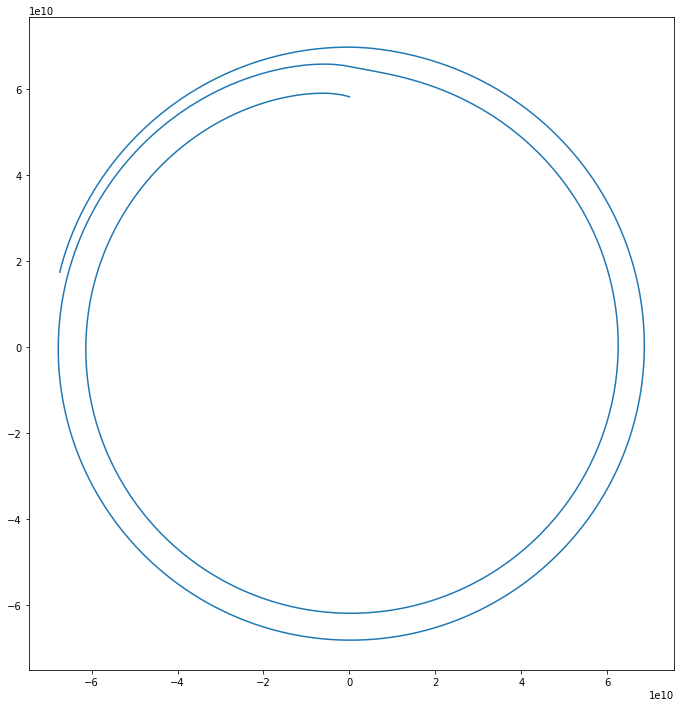

In [200]:
plt.plot(c[:, 0], c[:, 1])
plt.gca().set_aspect('equal')

In [306]:
def measure_quality(predicted_points, real_distances):
  
    predicted_distances = np.sqrt((predicted_points ** 2).sum(axis=-1))
    
    cur_real_idx = real_distances.argmin()
    min_pred_dist = predicted_distances.argmin()
    
    scores1 = []
    
    # Just set one way for iterating over trajectory
    
    pred_indexing = lambda idx: (min_pred_dist+idx) % len(predicted_points)
    real_indexing = lambda idx: idx % len(real_distances)
    
    for i in range(len(predicted_points)):
        
        curr_dist = predicted_distances[pred_indexing(i)]
        
        while (np.abs(real_distances[real_indexing(cur_real_idx+1)] - predicted_distances[pred_indexing(i)]) < 
                        np.abs(real_distances[real_indexing(cur_real_idx)] - predicted_distances[pred_indexing(i)])):
            cur_real_idx += 1
        
        scores1.append( (predicted_distances[pred_indexing(i)] - real_distances[real_indexing(cur_real_idx)]) /
                                          real_distances[real_indexing(cur_real_idx)])
    
    #################
    
    predicted_points = np.array(list(reversed(predicted_points)))
    real_distances = np.array(list(reversed(real_distances)))
    
    predicted_distances = np.sqrt((predicted_points ** 2).sum(axis=-1))
    
    cur_real_idx = real_distances.argmin()
    min_pred_dist = predicted_distances.argmin()
    
    scores2 = []
    
    # Just set one way for iterating over trajectory
    
    pred_indexing = lambda idx: (min_pred_dist+idx) % len(predicted_points)
    real_indexing = lambda idx: idx % len(real_distances)
    
    for i in range(len(predicted_points)):
        
        curr_dist = predicted_distances[pred_indexing(i)]
        
        while (np.abs(real_distances[real_indexing(cur_real_idx+1)] - predicted_distances[pred_indexing(i)]) < 
                        np.abs(real_distances[real_indexing(cur_real_idx)] - predicted_distances[pred_indexing(i)])):
            cur_real_idx += 1
        
        scores2.append( (predicted_distances[pred_indexing(i)] - real_distances[real_indexing(cur_real_idx)]) /
                                          real_distances[real_indexing(cur_real_idx)])
  
    
    return scores1, scores2

# Theoretical predictions

In [300]:
planet_data = pd.read_excel('PlanetData.xlsx')

In [90]:
planet_data

,Name,Mass,Velocity,Distance
0,Sun,1.988500e+30,-,-
1,Mercury,3.330220e+23,58980,46000000000
2,Venus,4.867500e+24,35260,107480000000
3,Earth,5.972600e+24,30290,147090000000
4,Mars,6.417100e+23,26500,206620000000
5,Jupiter,1.898600e+27,13720,740520000000
6,Saturn,5.684600e+26,10180,1352550000000
7,Uranus,8.683200e+25,7110,2741300000000
8,Neptune,1.024300e+26,5500,4444450000000


In [16]:
sun_mass = 1.988500e+30

In [17]:
def get_ellipse_points(sun_mass, body_mass, velocity, r):
   
    points = []
    
    for i in np.linspace(0, 2*np.pi, 100):
        rad = ((velocity*r) ** 2) / ( sun_mass * G * ( 1 + ( np.sqrt(1 + 2*(velocity*r/(G*sun_mass))**2 * ((velocity**2)/2 - G*sun_mass/r) ) ) * np.cos(i)) )
        x = np.cos(i)*rad
        y = np.sin(i)*rad
        points.append([x, y])
    
    return np.array(points)

# Comparing methods

In [99]:
plt.rcParams['figure.figsize'] = (15, 12)

In [117]:
def get_data_for_planet(planet_name, num_points):
    
    # Theory
    
    sun_mass = planet_data[planet_data.Name == 'Sun'].Mass.values[0]
    planet_mass = planet_data[planet_data.Name == planet_name].Mass.values[0]
    planet_speed = planet_data[planet_data.Name == planet_name].Velocity.values[0]
    planet_dist = planet_data[planet_data.Name == planet_name].Distance.values[0]
    
    p = get_ellipse_points(sun_mass, planet_mass, planet_speed, planet_dist)
    
    p = np.concatenate([p, np.zeros(p.shape[0]).reshape([p.shape[0], 1])], axis=1)
    
    # Modeling
    
    data = load_body_data('two_bodies.csv', planet_name, num_points)
    
    return {'Model':data, 'Theory':p}

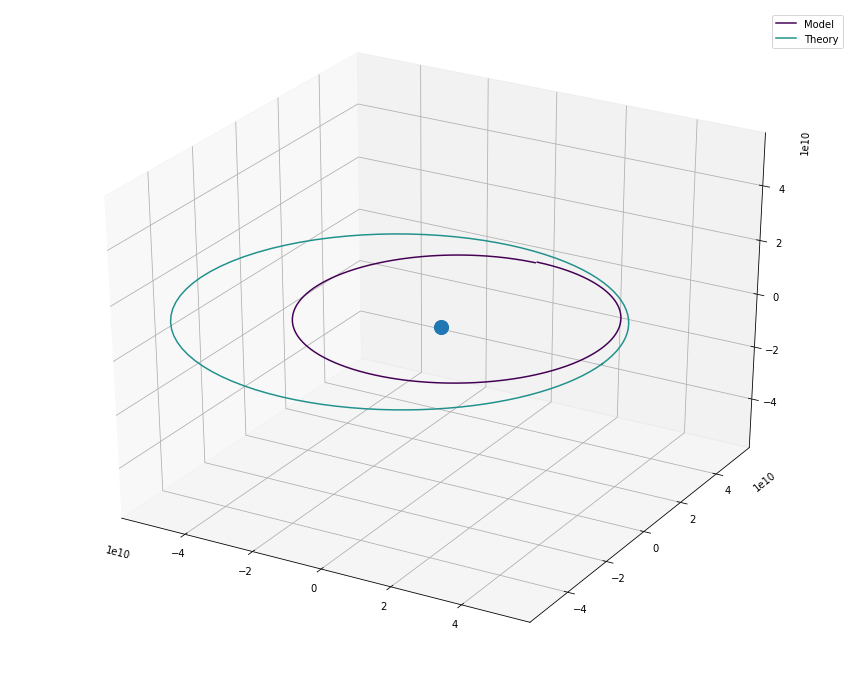

In [311]:
draw_data = get_data_for_planet('Mercury', num_points = 4605)

plot_output(draw_data)

In [312]:
planet_raw = pd.read_excel("MovementData/Mercury4.xlsx", names=['dist', 'speed']).values * 1e3

In [313]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.09218826745028035
Model divergence:  0.12058159566708451


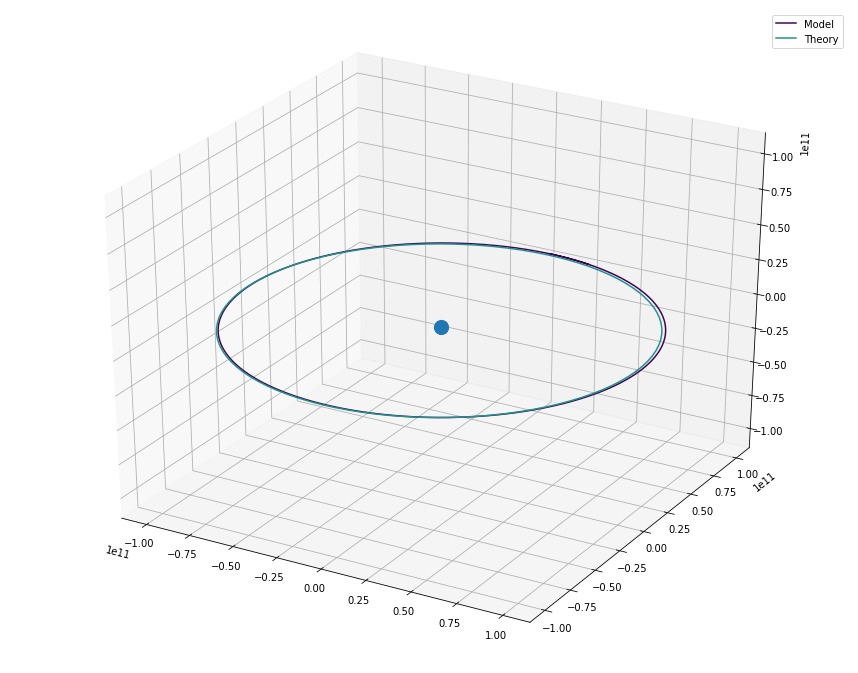

In [314]:
draw_data = get_data_for_planet('Venus', 20000)

plot_output(draw_data)

In [315]:
planet_raw = pd.read_excel("MovementData/venus4.xlsx", names=['dist', 'speed']).values * 1e3

In [316]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  1.306782764907822e-05
Model divergence:  0.003000093622522693


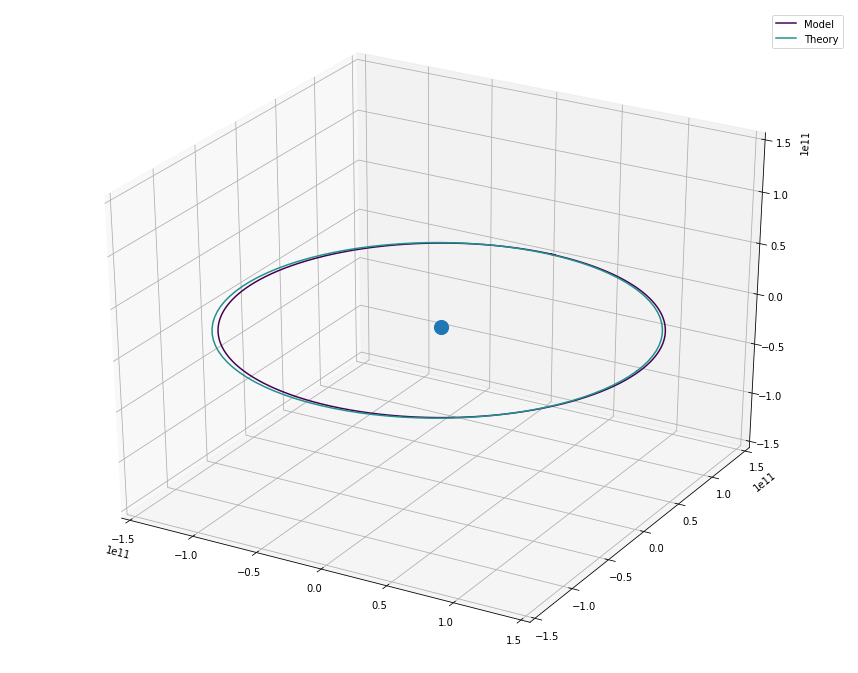

In [317]:
draw_data = get_data_for_planet('Earth', 31000)

plot_output(draw_data)

In [318]:
planet_raw = pd.read_excel("MovementData/earth4.xlsx", names=['dist', 'speed']).values * 1e3

In [319]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  1.6315027013334107e-05
Model divergence:  0.005357301311781715


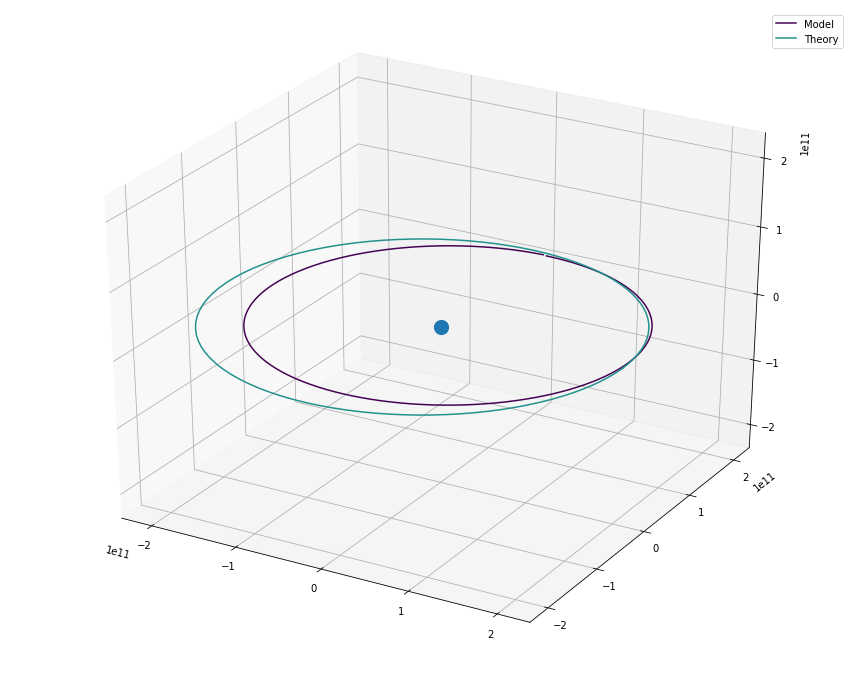

In [308]:
draw_data = get_data_for_planet('Mars', 50000)

plot_output(draw_data)

In [309]:
planet_raw = pd.read_excel("MovementData/mars4.xlsx", names=['dist', 'speed']).values * 1e3

In [310]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.038730538142028835
Model divergence:  0.045636291275357024


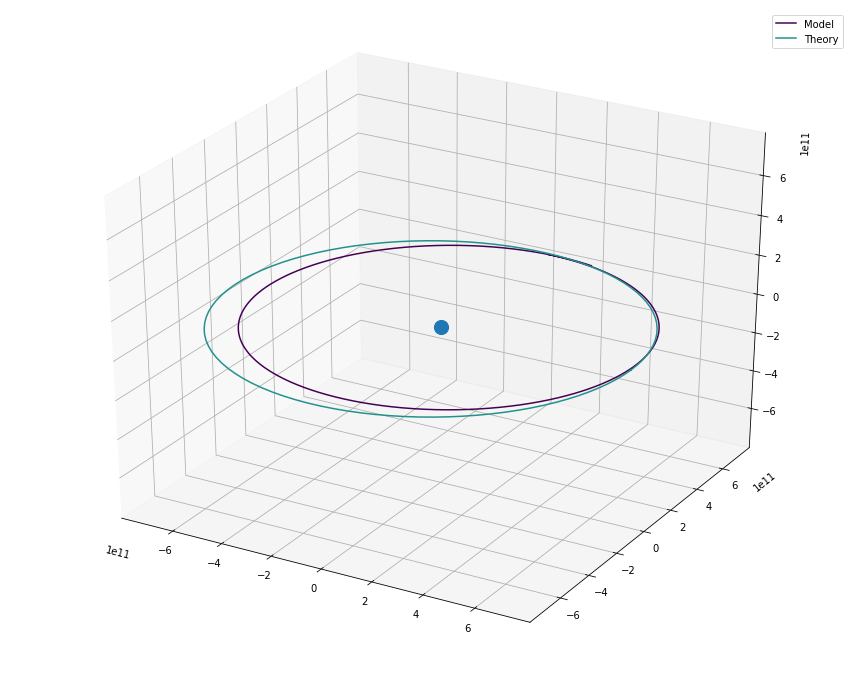

In [320]:
draw_data = get_data_for_planet('Jupiter', 350000)

plot_output(draw_data)

In [321]:
planet_raw = pd.read_excel("MovementData/jupiter4.xlsx", names=['dist', 'speed']).values * 1e3

In [322]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.023444615717603274
Model divergence:  0.03677497892886085


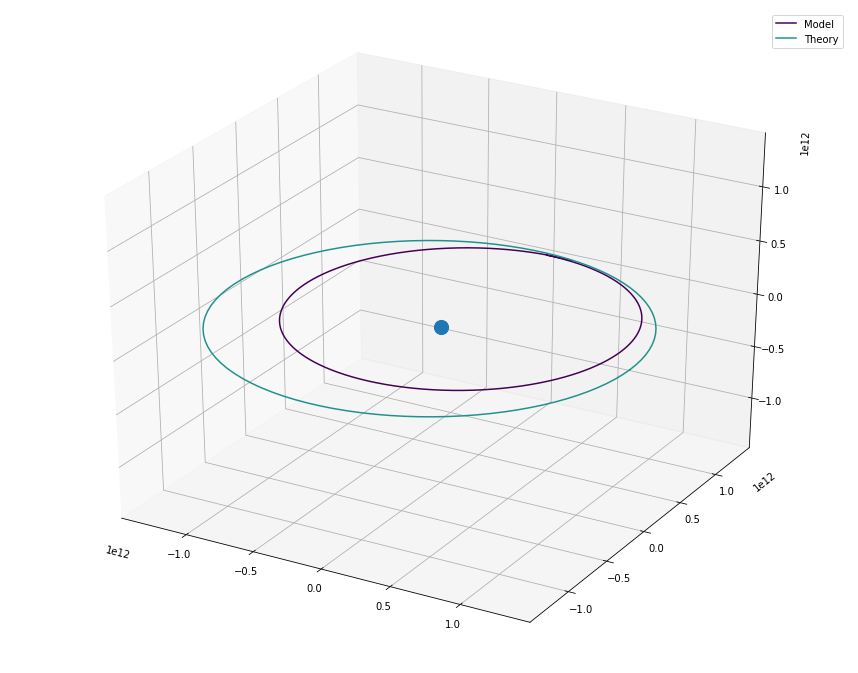

In [323]:
draw_data = get_data_for_planet('Saturn', 700000)

plot_output(draw_data)

In [324]:
planet_raw = pd.read_excel("MovementData/saturn4.xlsx", names=['dist', 'speed']).values * 1e3

In [325]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.0004441635991895567
Model divergence:  0.13520260042695498


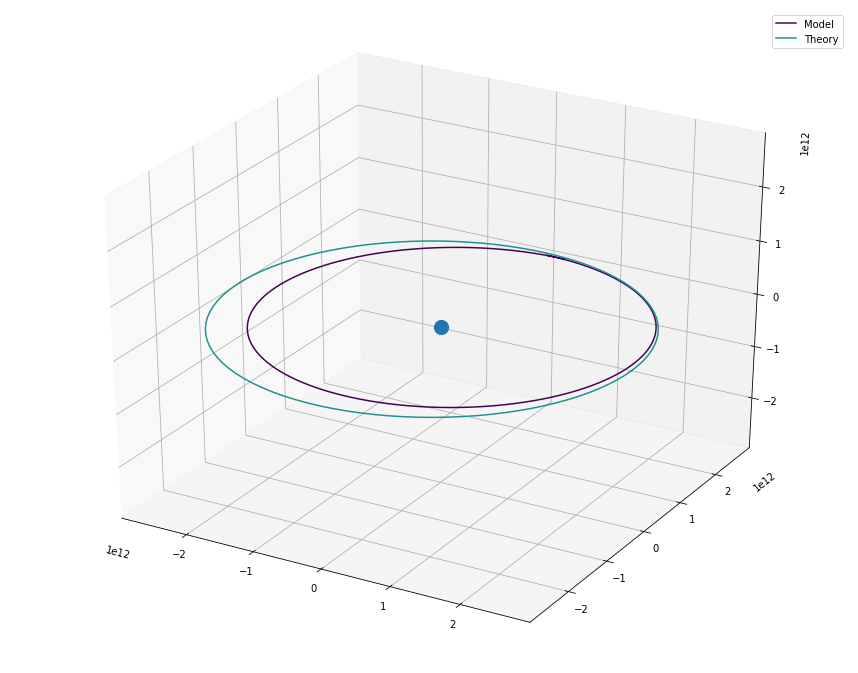

In [326]:
draw_data = get_data_for_planet('Uranus', 2300000)

plot_output(draw_data)

In [327]:
planet1 = pd.read_excel("MovementData/uranusf1.xlsx", names=['dist', 'speed']).values * 1e3

In [328]:
planet2 = pd.read_excel("MovementData/uranusf2.xlsx", names=['dist', 'speed']).values * 1e3

In [329]:
planet_raw = np.concatenate([planet1, planet2])

In [330]:
res1, res2 = measure_quality(draw_data['Theory'], planet_raw[:, 0])

th1 = np.abs(res1).mean()
th2 = np.abs(res2).mean()

res1, res2 = measure_quality(draw_data['Model'], planet_raw[:, 0])

mod1 = np.abs(res1).mean()
mod2 = np.abs(res2).mean()

print('Theory divergence: ', min([th1, th2]))
print('Model divergence: ', min([mod1, mod2]))

Theory divergence:  0.02180793594146946
Model divergence:  0.05337372121199383
